# 🧠 Introducción: Funciones de Orden Superior en Python

En Python, **las funciones son ciudadanos de primera clase**. Esto significa que pueden:

- Asignarse a una variable.
- Almacenarse en estructuras de datos.
- Pasarse como argumentos a otras funciones.
- Ser retornadas como resultados de otras funciones.


Una **función de orden superior** (*Higher-Order Function* o HOF) es aquella que **recibe una función como argumento y/o retorna otra función** como resultado.

---

## ✨ ¿Por qué son útiles?

Las funciones de orden superior permiten:

- Reutilizar lógica.
- Crear código más conciso, limpio y expresivo.
- Separar el “qué se hace” del “cómo se hace”.

---

## 🔍 Ejemplos de la vida real

| Situación cotidiana                         | Equivalente a una HOF                        |
|---------------------------------------------|----------------------------------------------|
| Aplicar un filtro a una imagen              | Pasar una función de transformación a píxeles |
| Ordenar una lista de objetos                | Usar una función `key` para ordenar          |
| Generar contraseñas                         | Usar funciones generadoras y de validación   |

---




In [ ]:
def sumamal(x,y):
    return x-y

x=sumamal(5,9)
sumamal(sumamal(4,6),sumamal(4,8))
mama=sumamal
mama(3,8)

-5

In [ ]:
def f(x):
    return x*x
def g(x):
    return x-1

A=[f,g,f]
for k in A:
    print(k(2))


4
1
4


# **Funciones de orden superior**  


- Funciones como argumentos y como valores retornados.
- Funciones anidadas:
- Contenedores   
- Funciones lambdas, filter, map, reduce y zip.
- Decoradores

[Python tutor como recurso de apoyo](https://pythontutor.com/cp/composingprograms.html#mode=edit)


Por ejemplo: la composición de funciones es un método natural de combinación de funciones usado frecuentemente en matemáticas. Es decir, dadas dos funciones $f(x)$ y $g(x)$ previamente definidas, podríamos definir $h(x) = f(g(x))$ de la siguiente manera en python:

~~~python
>>> def h(x):
      return f(g(x))
~~~


Consideremos ahora los siguientes ejemplos:

In [ ]:
#Funciones como argumentos de otras funciones
def f(x):
	return x * x

def g(x):
	return x + 1

print(f(g(2)))


print(g(f(2)))
print(f(f(f(2))))

9
5
256


In [ ]:
# Función que retornan la imagen de otra función
def h(x):
    return f(x) + g(x)

print(h(2))

7


In [ ]:
# Función que retorna otra función
def m(x):
    return f(g(x))

print(m(2))

9


Las funciones de orden superior se basan en dos conceptos fundamentales: funciones como argumentos (funciones callback) y funciones como resultado (funciones de retorno). Esto te permite crear funciones más flexibles y reutilizables, ya que puedes modificar su comportamiento sin tener que reescribir todo el código.

Existen tres tipos principales de funciones de orden superior:

* Funciones que toman funciones como argumentos: Estas funciones aceptan otras funciones como argumentos y las utilizan dentro de su propia lógica.

* Funciones que retornan funciones: Estas funciones crean y devuelven nuevas funciones basadas en su lógica interna.

* Funciones que hacen ambas cosas: A veces, las funciones pueden recibir funciones como argumentos y también retornar otras funciones.



### Funciones que toman funciones como argumentos:

#### Ejemplo 1:

In [ ]:
def fun_pricipal(func, tupla):
    """recibe una función y una tupla"""
    resultado = func(tupla)
    return resultado

# Ejemplo de uso:
def suma_de_cuadrados(tupla):
    return tupla[0]**2+tupla[1]**2


print(fun_pricipal(suma_de_cuadrados,(3,4,5,6)))

def suma_de_todo(tupla):
    rta=sum(tupla)
    return  rta


print(fun_pricipal(suma_de_todo,(3,4,5,6)))

# hacer más ejemplos, cambiando la función por ejempo la suma de los elementos, la función max
#print(fun_pricipal(max,(3,4,5,6)))

25
18


#### Ejemplo 2:

Suma de los primeros $n$ numeros:

$$\sum_{k=1}^n k = 1+2+3+4+ \cdot\cdot\cdot + n $$

In [ ]:
# Calcula la suma de los primeros n números naturales
def suma_naturales(n):
    total = 0
    k = 1
    while k <= n:
        total = total + k
        k = k + 1
    return total
suma_naturales(100)

5050

Suma de los primeros cubos menores a  $n$:

$$\sum_{k=1}^n k^3 = 1^3+2^3+3^3+4^3+ \cdot\cdot\cdot + n^3 $$

In [ ]:
# Calcula la suma de los cubos de los primeros n números naturales
def suma_cubos(n):
    total = 0
    k = 1
    while k <= n:
        total = total + k*k*k
        k = k + 1
    return total
suma_cubos(3)

Aproximacón de $\pi$ dado por Leibniz:
$$\pi \approx \sum_{k=1}^N\frac{8}{(4k-1)(4k-3)}.$$

In [ ]:
#Calcula una aproximación del número pi
def aproxima_pi(n):
    total = 0
    k = 1
    while k <= n:
        total = total + 8 / ((4*k-1) * (4*k-3))
        k = k + 1
    return total

aproxima_pi(10000)

3.1415426535898203

Nótese que las tres funciones anteriores podrían ser expresadas por la siguiente plantilla:
~~~python
def <nombre_función>(n):
    total = 0
    k = 1
    while k <= n:
        total = total + <término>(k)
        k = k + 1
    return total
~~~

Ahora considere lo siguiente:

In [ ]:
def sumatoria(n, term): # Función plantilla
    total = 0
    k = 1
    while k <= n:
        total = total + term(k)
        k = k + 1
    return total

#Las siguientes funciones se usan en la plantilla como argumento
def identidad(x):
    return x

def cubo(x):
    return x*x*x

def termino_pi(x):
    return 8 / ((4*x-1) * (4*x-3))

# Funciones que usan a la plantilla como retorno
def suma_naturales(n):
    return sumatoria(n, identidad)

def suma_cubos(n):
    return sumatoria(n, cubo)

def aproxima_pi(n):
    return sumatoria(n, termino_pi)

print('La suma de los primeros 100 naturales es:', suma_naturales(100))
print('La suma de los primeros 4 cubos de naturales es:', suma_cubos(3))
print('El valor aproximado de pi sumando 1000 términos es:', aproxima_pi(1000))

La suma de los primeros 100 naturales es: 5050
La suma de los primeros 4 cubos de naturales es: 36
El valor aproximado de pi sumando 1000 términos es: 3.141092653621038


## Funciones que retornan funciones:

In [ ]:
def sumar(x, y):
    return x + y

def restar(x, y):
    return x - y

def multiplicar(x, y):
    return x * y

def dividir(x, y):
    return x / y

def obtener_operacion(operador):
    if operador == '+':
        return sumar
    elif operador == '-':
        return restar
    elif operador == '*':
        return multiplicar
    elif operador == '/':
        return dividir
    else:
        return None

s=obtener_operacion("+")
s(4,5)
obtener_operacion("*")(4,8)

32


### Ejercicio:

https://es.wikipedia.org/wiki/Norma_vectorial

1) Crear tres funciones que reciben un vector de $R^3$ y retorna la norma 1, la euclidiana y la norma infinito.

2) Crear una función llamada TipoNorma que recibe un número ya sea 1, 2  o 3 y retorna una función para calcular la norma.

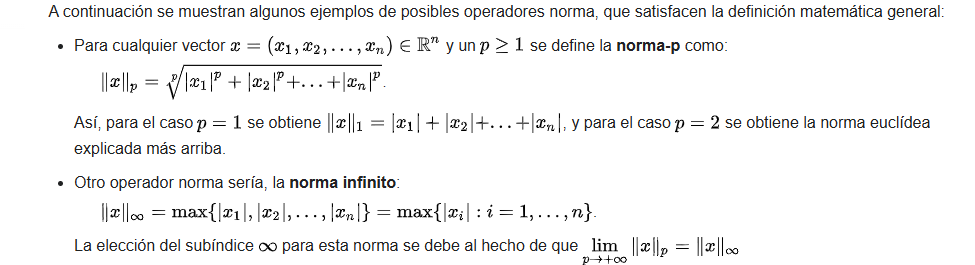

In [ ]:
# Solución del ejercicio
def norma1(a,b,c):
    rta= abs(a)+abs(b)+abs(c)
    return rta

def norma2(a,b,c):
    rta= (abs(a)**2+abs(b)**2+abs(c)**2)**(1/2)
    return rta

def norma_infinito(a,b,c):
    rta=max([abs(a),abs(b),abs(c)])
    return rta

norma1(-3,0,-4),norma2(-3,0,-4),norma_infinito(-3,0,-4)

def TipoNorma(n):
    if n == 1:
        return norma1
    elif n == 2:
        return norma2
    elif n == 3:
        return norma_infinito
    else:
        return "Eso no existe"

jaja= TipoNorma(7)
jaja

'Eso no existe'

## Funciones que hacen ambas cosas:
### Ejemplo 4

In [ ]:
def mediana_par(x):
  return print(f"promediar las posiciones {x/2} y {x/2+1}")

def mediana_impar(x):
  return print(f"La mediana esta en la posición {(x+1)/2}")

def par_o_impar(x):
  if x%2==0:
    return True
  else:
    return False

def mediana(fun, x):
  if fun(x)==True:
    return mediana_par
  else:
    return mediana_impar

n=8
mediana(par_o_impar,n)(n)

promediar las posiciones 4.0 y 5.0


# TALLER

1. Escribir una función llamada `aplicarOperacion` que tome como argumentos una función y una lista de números, y devuelva una nueva lista donde la función dada como argumento se haya aplicado a cada elemento de la lista original.

2. Crear diferentes funciones (por ejemplo, `cuadrado`, `cubo`, `duplicar`, etc.) y utiliza la función `aplicarOperacion` para probarlas con diferentes listas de números.

3. Crear una función llamada `calculadora` que acepte un operador aritmético como argumento (puede ser `'+'`, `'-'`, `'*'`, `'/'`) y retorne una función que tome dos números como entrada y realice la operación aritmética correspondiente. La función retornada debe imprimir el resultado.

4. Crear una función llamada `sumaLista` que reciba una lista de números como argumento y devuelva la suma de los valores de la lista. Otra función llamada `productoLista` que tome una lista como argumento y devuelva el producto de los elementos de la lista. Por último, cree una función de orden superior que se llame `Compactadora` que tome la longitud de una lista como argumento y dependiendo de si esta longitud es par o impar retorne las funciones `sumaLista` o `productoLista` respectivamente.

5. Escribir una función llamada `AplicarFuncionCondicional` que tome tres argumentos: una función `f`, un número `x` y una función condición. La función `AplicarFuncionCondicional` debe devolver el resultado de aplicar la función `f` al número `x` si la función condición devuelve `True` cuando se le pasa el número `x`. De lo contrario, debe devolver `None`.

6. Usar la función `AplicarFuncionCondicional` del ejercicio anterior en los siguientes casos:

   a. Si un número no es primo, mostrar los divisores de este número.  
   
   b. Si una palabra empieza por un dígito, mostrar la cadena sin ese dígito.

7. Escribe una función llamada `GenerarContraseña` que tenga tres argumentos: una longitud deseada (un entero positivo), una función generadora de caracteres y una función condicional que determine si la contraseña generada es válida. La función debe imprimir todas las contraseñas generadas hasta encontrar una que cumpla con la condición, y luego devolver esa contraseña válida.

8. Crear dos funciones: la primera, llamada `GenerarCaracter`, no debe tener argumentos de entrada y debe retornar un carácter al azar, que puede ser una letra mayúscula, una letra minúscula o un dígito numérico. La segunda, llamada `Condicional`, debe aceptar una cadena de texto como argumento y retornar un valor booleano (`True` o `False`). Debe devolver `True` si la cadena contiene al menos un dígito, una letra minúscula y una letra mayúscul


In [1]:
2+2

4

In [2]:
# Ejercicio 5
def AplicarFuncionCondicional(f, x, condicion):
    """
    Aplica la función f a x si la condición es True para x.

    Args:
        f: La función a aplicar.
        x: El argumento para la función f y la función condición.
        condicion: La función condición.

    Returns:
        El resultado de f(x) si condicion(x) es True, de lo contrario None.
    """
    if condicion(x):
        return f(x)
    else:
        return None

# Funciones auxiliares para el Ejercicio 6a
def es_primo(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def obtener_divisores(n):
    divisores = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisores.append(i)
    return divisores

def mostrar_divisores(n):
    if not es_primo(n):
        print(f"Los divisores de {n} son: {obtener_divisores(n)}")

# Usando AplicarFuncionCondicional para el Ejercicio 6a
print("Ejercicio 6a:")
AplicarFuncionCondicional(mostrar_divisores, 12, lambda x: not es_primo(x))
AplicarFuncionCondicional(mostrar_divisores, 7, lambda x: not es_primo(x))


# Funciones auxiliares para el Ejercicio 6b
def empieza_con_digito(s):
    return len(s) > 0 and s[0].isdigit()

def cadena_sin_primer_digito(s):
    if empieza_con_digito(s):
        return s[1:]
    return s # Should not happen if used with empieza_con_digito as condition

# Usando AplicarFuncionCondicional para el Ejercicio 6b
print("\nEjercicio 6b:")
resultado1 = AplicarFuncionCondicional(cadena_sin_primer_digito, "123Hola", empieza_con_digito)
print(f"Resultado para '123Hola': {resultado1}")

resultado2 = AplicarFuncionCondicional(cadena_sin_primer_digito, "Hola123", empieza_con_digito)
print(f"Resultado para 'Hola123': {resultado2}")

Ejercicio 6a:
Los divisores de 12 son: [1, 2, 3, 4, 6, 12]

Ejercicio 6b:
Resultado para '123Hola': 23Hola
Resultado para 'Hola123': None


In [8]:
# Ejercicio 5
def AplicarFuncionCondicional(f, x, condicion):
    """
    Aplica la función f a x si la condición es True para x.

    Args:
        f: La función a aplicar.
        x: El argumento para la función f y la función condición.
        condicion: La función condición.

    Returns:
        El resultado de f(x) si condicion(x) es True, de lo contrario None.
    """
    if condicion(x):
        return f(x)
    else:
        return None

# Funciones auxiliares para el Ejercicio 6a
def es_primo(n):
    if n < 2:
        return True
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return True
    return False

def obtener_divisores(n):
    divisores = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisores.append(i)
    return divisores


x=AplicarFuncionCondicional(obtener_divisores, 12, es_primo)
x

[1, 2, 3, 4, 6, 12]